In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/wentingjiang/Desktop/Projects/advanced_analytics_kul/assignment3/reviews.csv")
df.shape

(16319, 5)

In [5]:
df.groupby('label').count()

,Unnamed: 0,review_id,app_id,review_text
label,,,,
0.0,2786,2786,2786,2786
1.0,13532,13532,13532,13514


In [6]:
df.head()

,Unnamed: 0,review_id,app_id,review_text,label
0,0,136524320.0,2008820,i can confirm that the game contains a knight ...,1.0
1,1,136524365.0,2008820,"Really good game, enjoyed every second of it",1.0
2,2,116734222.0,1729900,Its not finished yet but honestly it has great...,1.0
3,3,116989907.0,1729900,"Hey. It's really good. Songs are good, Gamepla...",1.0
4,4,136568878.0,307950,Fun so far,1.0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import tensorflow as tf
import tensorflow_hub as hub
import keras.backend as K
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Concatenate, Lambda, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping

2023-05-02 15:00:02.788689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2023-05-02 15:02:18.080313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
df=df[~df['review_text'].isna()]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df["review_text"], df["label"], test_size=0.2, 
                                                    # stratify will make sure the labels are
                                                    # well proportioned in train and test
                                                    stratify=df["label"], random_state=42)

In [17]:
# Prepare data
X_train = [text.lower() for text in X_train] # convert to lowercase
X_test = [text.lower() for text in X_test] # convert to lowercase
X_train_embeddings = embed(X_train) # generate embeddings for train data
X_test_embeddings = embed(X_test) # generate embeddings for test data

In [19]:
# from gensim.models import KeyedVectors

# # Load the pre-trained GloVe embeddings
# glove_model = KeyedVectors.load_word2vec_format('path/to/glove.6B.100d.txt', binary=False)

# # Define a function to convert a list of text data to a list of embeddings
# def get_embeddings(text_data):
#     embeddings = []
#     for text in text_data:
#         text_embedding = np.zeros(glove_model.vector_size)
#         for word in text.split():
#             if word in glove_model.vocab:
#                 text_embedding += glove_model[word]
#         embeddings.append(text_embedding)
#     return np.array(embeddings)

# # Obtain the embeddings for the text data
#embeddings = get_embeddings(df['review_text'])

In [22]:
df.head()

,Unnamed: 0,review_id,app_id,review_text,label
0,0,136524320.0,2008820,i can confirm that the game contains a knight ...,1.0
1,1,136524365.0,2008820,"Really good game, enjoyed every second of it",1.0
2,2,116734222.0,1729900,Its not finished yet but honestly it has great...,1.0
3,3,116989907.0,1729900,"Hey. It's really good. Songs are good, Gamepla...",1.0
4,4,136568878.0,307950,Fun so far,1.0


In [23]:
#embeddings = load_glove_embeddings(df['review_text'])

embeddings = X_train_embeddings

# Use PCA to reduce the dimensionality of the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


In [26]:
reduced_embeddings[:, 0]

array([ 0.03546253,  0.16185158, -0.1239311 , ..., -0.25949305,
       -0.17205298,  0.22869626])

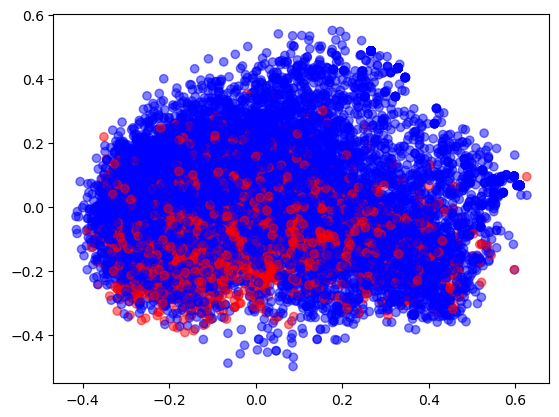

In [29]:
from matplotlib.colors import ListedColormap

# Define the colors for the two labels
colors = ListedColormap(['red', 'blue'])

# Plot the reduced embeddings, colored by label
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=y_train, cmap=colors, alpha=0.5)
plt.show()

/Users/wentingjiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wentingjiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


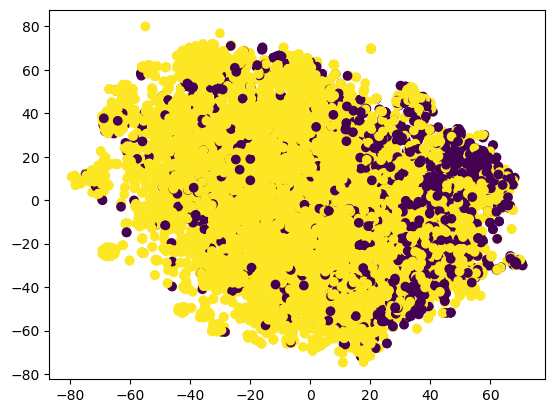

In [30]:
from sklearn.manifold import TSNE

# Create a t-SNE object with 2 output dimensions
tsne = TSNE(n_components=2)

# Fit and transform the embeddings using t-SNE
reduced_embeddings = tsne.fit_transform(embeddings)

# # Plot the reduced embeddings, colored by label
# plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=y_train)
# plt.show()


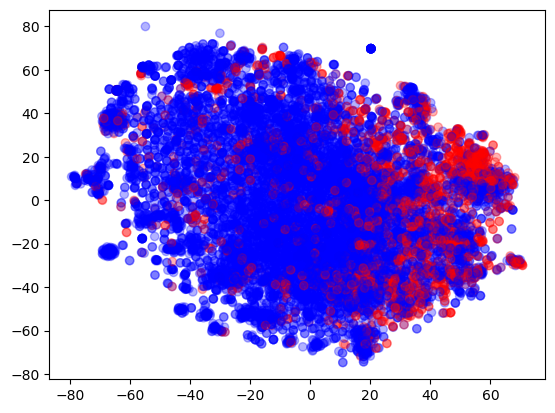

In [32]:
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=y_train, cmap=colors, alpha=0.3)